# Arbitrary Value Imputation  
[source](https://www.youtube.com/watch?v=mCL2xLBDw8M&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=36)

Put any value which is not present in any of the observations of that columns into its missing values.  
Used when data is to missing at random, unlike mean/median method. but again its not widely used because there are better ways, will study ahead.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('assets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()# 

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [6]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)


In [7]:
X_train[X_train['Age'].isnull()].head(10)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
29,NaN,7.8958,0,99.0,-1.0,7.8958,7.8958
55,NaN,35.5000,0,99.0,-1.0,35.5000,35.5000
533,NaN,22.3583,2,99.0,-1.0,22.3583,22.3583
495,NaN,14.4583,0,99.0,-1.0,14.4583,14.4583
468,NaN,7.7250,0,99.0,-1.0,7.7250,7.7250
409,NaN,25.4667,4,99.0,-1.0,25.4667,25.4667
425,NaN,7.2500,0,99.0,-1.0,7.2500,7.2500
101,NaN,7.8958,0,99.0,-1.0,7.8958,7.8958
298,NaN,30.5000,0,99.0,-1.0,30.5000,30.5000
260,NaN,7.7500,0,99.0,-1.0,7.7500,7.7500


In [9]:
X_train['Age'].var(),X_train['Age_99'].var(),X_train['Age_minus1'].var()

(210.2517072477438, 932.9665366701436, 315.99550362600644)

In [10]:
X_train['Fare'].var(),X_train['Fare_999'].var(),X_train['Fare_minus1'].var()

(2761.031434948639, 47525.47059536007, 2675.2394049177087)

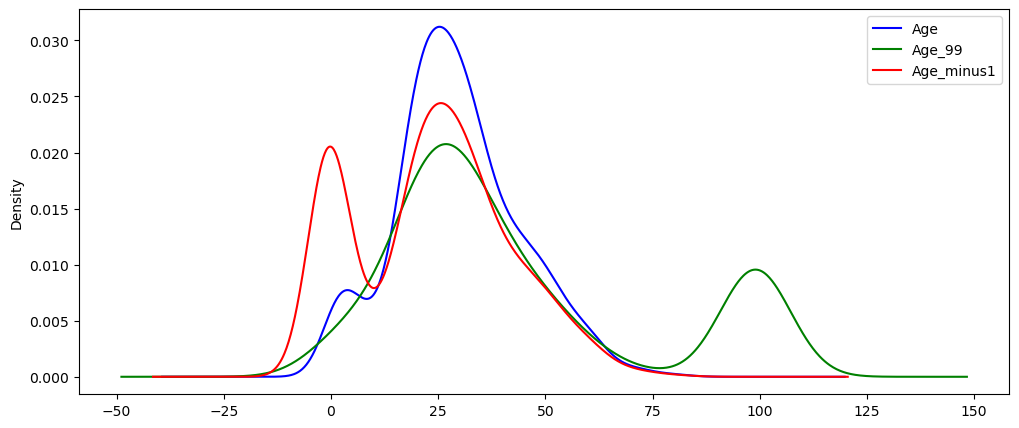

In [12]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax,color='blue')

X_train['Age_99'].plot(kind='kde',ax=ax,color='green')

X_train['Age_minus1'].plot(kind='kde', ax=ax, color='red')

lines,labed = ax.get_legend_handles_labels()
ax.legend()

plt.show()

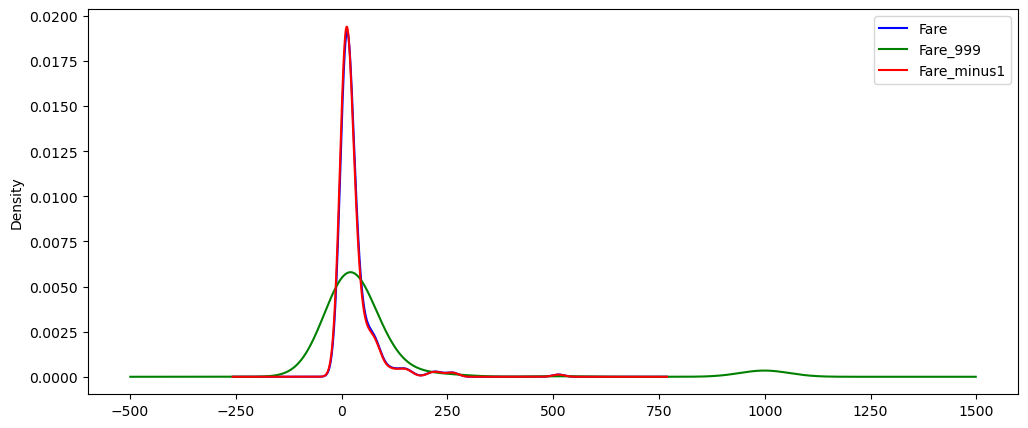

In [13]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax,color='blue')

X_train['Fare_999'].plot(kind='kde',ax=ax,color='green')

X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='red')

lines,labed = ax.get_legend_handles_labels()
ax.legend()

plt.show()

In [14]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [15]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


<Axes: >

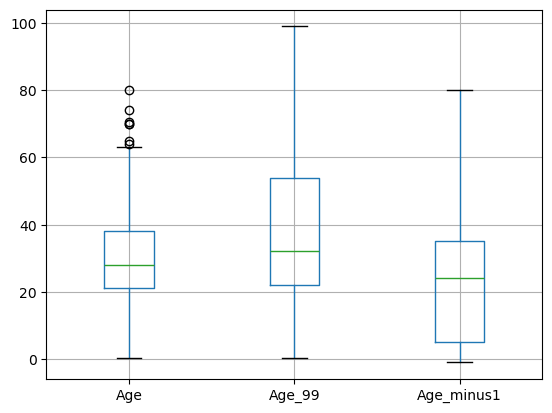

In [17]:
X_train[['Age','Age_99','Age_minus1']].boxplot() 

<Axes: >

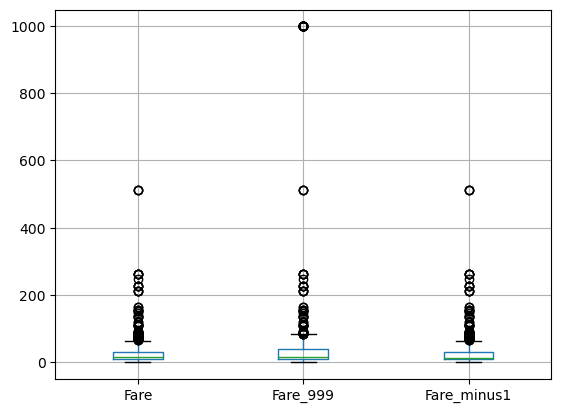

In [18]:
X_train[['Fare','Fare_999','Fare_minus1']].boxplot()

## Using Sklearn

In [19]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [20]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)


In [21]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [22]:
trf.fit(X_train)

C:\Users\jawwa\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])